In [1]:
#sin곡선
import numpy as np
a = np.arange(0, 10, 0.5) #0~10까지 0.5간격으로 값 생성
print(len(a), a)
data = np.sin(a)
print(data)
print(len(data))

20 [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
20


In [2]:
#data = 0~10
timestep = 3 # t-3, t-2, t-1 데이터를 이용하여 t 시점의 값을 예측
X, y = [], []

for i in range(timestep, len(data)):
    X.append(np.array([data[i-j] for j in range(timestep, 0, -1)]))
    y.append(data[i])

print(X)
print(y)

[array([0.        , 0.47942554, 0.84147098]), array([0.47942554, 0.84147098, 0.99749499]), array([0.84147098, 0.99749499, 0.90929743]), array([0.99749499, 0.90929743, 0.59847214]), array([0.90929743, 0.59847214, 0.14112001]), array([ 0.59847214,  0.14112001, -0.35078323]), array([ 0.14112001, -0.35078323, -0.7568025 ]), array([-0.35078323, -0.7568025 , -0.97753012]), array([-0.7568025 , -0.97753012, -0.95892427]), array([-0.97753012, -0.95892427, -0.70554033]), array([-0.95892427, -0.70554033, -0.2794155 ]), array([-0.70554033, -0.2794155 ,  0.21511999]), array([-0.2794155 ,  0.21511999,  0.6569866 ]), array([0.21511999, 0.6569866 , 0.93799998]), array([0.6569866 , 0.93799998, 0.98935825]), array([0.93799998, 0.98935825, 0.79848711]), array([0.98935825, 0.79848711, 0.41211849])]
[0.9974949866040544, 0.9092974268256817, 0.5984721441039564, 0.1411200080598672, -0.35078322768961984, -0.7568024953079282, -0.977530117665097, -0.9589242746631385, -0.7055403255703919, -0.27941549819892586, 0.

In [3]:
#신경망에 입력하기 위해 차원 변경
X, y = np.array(X).reshape(len(X),3,1), np.array(y).reshape(len(y),1)
print(X.shape)
print(y.shape)

(17, 3, 1)
(17, 1)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

np.random.seed(0)

model = Sequential()

#units 출력 노드 수
model.add(SimpleRNN(units=10, input_shape=(3,1)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')

In [8]:
history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 1s 946ms/step - loss: 0.3939
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3794
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.3661
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.3537
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.3423
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3316
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.3218
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.3129
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.3048
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2972
Epoch 11/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2901
Epoch 12/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2833
Epoch 13/1000
1/1 [=========================

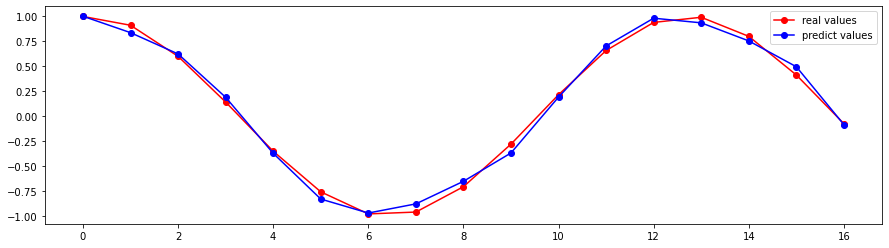

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,4))
plt.plot(data[3:], 'ro-', label='real values') #실제 값
plt.plot(model.predict(X), 'bo-', label='predict values') #예측값
plt.legend()

plt.show()

In [10]:
#단어예측
text='''
경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n
그런 식으로 하면 말이 안된다\n
새로 태어난 말이 배가 고프다\n
'''

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer

#단어 집합을 만들고 단어에 고유한 숫자 인덱스를 부여(1부터 시작)
t = Tokenizer()
t.fit_on_texts([text])

#원핫인코딩에서는 0부터 시작하므로 미리 1을 더함
vocab_size = len(t.word_index)+1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 20


In [12]:
print(t.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11, '그런': 12, '식으로': 13, '하면': 14, '안된다': 15, '새로': 16, '태어난': 17, '배가': 18, '고프다': 19}


In [13]:
sequences = list()
for line in text.split('\n'): #문장별로 나누기
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 19


In [14]:
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11], [12, 13], [12, 13, 14], [12, 13, 14, 1], [12, 13, 14, 1, 15], [16, 17], [16, 17, 1], [16, 17, 1, 18], [16, 17, 1, 18, 19]]


In [15]:
max_len = max(len(l) for l in sequences) #모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

a = [[1,2,3],[4,5], [6,7,8,9]] 
print(a)
#같은 길이로 맞추고 길이가 부족한 경우 왼쪽에 공백을 채움
b = pad_sequences(a)
print(b)

#오른쪽에 공백을 채움
c = pad_sequences(a, padding='post')
print(c)

#오른쪽에 1을 채움
d = pad_sequences(a, padding='post', value=1)
print(d)

#최대 길이를 3으로 설정(왼쪽이 잘림, truncating='pre')
e = pad_sequences(a, padding='post', maxlen=3, truncating='post')
print(e)

[[1, 2, 3], [4, 5], [6, 7, 8, 9]]
[[0 1 2 3]
 [0 0 4 5]
 [6 7 8 9]]
[[1 2 3 0]
 [4 5 0 0]
 [6 7 8 9]]
[[1 2 3 1]
 [4 5 1 1]
 [6 7 8 9]]
[[1 2 3]
 [4 5 0]
 [6 7 8]]


In [18]:
#최대 사이즈에 맞추어 빈칸에 0으로 채움
sequences = pad_sequences(sequences, maxlen=max_len,
padding='pre')

In [19]:
print(sequences)

[[ 0  0  0  0  2  3]
 [ 0  0  0  2  3  1]
 [ 0  0  2  3  1  4]
 [ 0  2  3  1  4  5]
 [ 0  0  0  0  6  1]
 [ 0  0  0  6  1  7]
 [ 0  0  0  0  8  1]
 [ 0  0  0  8  1  9]
 [ 0  0  8  1  9 10]
 [ 0  8  1  9 10  1]
 [ 8  1  9 10  1 11]
 [ 0  0  0  0 12 13]
 [ 0  0  0 12 13 14]
 [ 0  0 12 13 14  1]
 [ 0 12 13 14  1 15]
 [ 0  0  0  0 16 17]
 [ 0  0  0 16 17  1]
 [ 0  0 16 17  1 18]
 [ 0 16 17  1 18 19]]


In [20]:
import numpy as np
sequences = np.array(sequences)
#리스트의 마지막 값을 제외하고 저장
X = sequences[:, :-1]
#리스트의 마지막 값만 저장
y = sequences[:,-1]

In [21]:
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]
 [ 0  0  0  0 12]
 [ 0  0  0 12 13]
 [ 0  0 12 13 14]
 [ 0 12 13 14  1]
 [ 0  0  0  0 16]
 [ 0  0  0 16 17]
 [ 0  0 16 17  1]
 [ 0 16 17  1 18]]


In [22]:
print(y)

[ 3  1  4  5  1  7  1  9 10  1 11 13 14  1 15 17  1 18 19]


In [25]:
from keras.utils import np_utils
#원핫인코딩
y = np_utils.to_categorical(y, num_classes=vocab_size)

In [26]:
print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

In [27]:
max_len

6

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

model = Sequential()
#Embedding(단어의개수, 벡터크기, 입력사이즈)
#각 단어에 대한 상수 인코딩
# y를 분리하였으므로 X의 길이는 5
model.add(Embedding(vocab_size, 10, input_length=max_len-1))
model.add(SimpleRNN(32)) #출력노드 32개
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.9963 - accuracy: 0.0000e+00 - 508ms/epoch - 508ms/step
Epoch 2/200
1/1 - 0s - loss: 2.9859 - accuracy: 0.0000e+00 - 10ms/epoch - 10ms/step
Epoch 3/200
1/1 - 0s - loss: 2.9757 - accuracy: 0.0526 - 14ms/epoch - 14ms/step
Epoch 4/200
1/1 - 0s - loss: 2.9656 - accuracy: 0.0526 - 15ms/epoch - 15ms/step
Epoch 5/200
1/1 - 0s - loss: 2.9554 - accuracy: 0.1053 - 18ms/epoch - 18ms/step
Epoch 6/200
1/1 - 0s - loss: 2.9450 - accuracy: 0.1053 - 21ms/epoch - 21ms/step
Epoch 7/200
1/1 - 0s - loss: 2.9344 - accuracy: 0.2105 - 15ms/epoch - 15ms/step
Epoch 8/200
1/1 - 0s - loss: 2.9235 - accuracy: 0.2632 - 15ms/epoch - 15ms/step
Epoch 9/200
1/1 - 0s - loss: 2.9122 - accuracy: 0.3684 - 16ms/epoch - 16ms/step
Epoch 10/200
1/1 - 0s - loss: 2.9004 - accuracy: 0.3684 - 10ms/epoch - 10ms/step
Epoch 11/200
1/1 - 0s - loss: 2.8881 - accuracy: 0.3684 - 11ms/epoch - 11ms/step
Epoch 12/200
1/1 - 0s - loss: 2.8751 - accuracy: 0.3684 - 11ms/epoch - 11ms/step
Epoch 13/200
1/1 - 0s - los

In [30]:
#모델, 토크나이저, 현재 단어, 반복할 횟수
def sentence_generation(model, t, current_word, n):
    #처음 들어온 단어도 마지막에 같이 출력하기 위해 저장
    init_word = current_word
    sentence = ''
    for _ in range(n): #n번 반복
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') #데이터에 대한 패딩
        #입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        pred = model.predict(encoded)
        result = np.argmax(pred, axis=1)
        for word, index in t.word_index.items():
            #만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break #해당 단어가 예측 단어이므로 break
        #현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' ' + word
        sentence = sentence + ' ' + word #예측 단어를 문장에 저장
    
    sentence = init_word + sentence
    return sentence

In [31]:
print(sentence_generation(model, t, '경마장에', 4))
# '경마장에' 라는 단어 뒤에는 총 4개의 단어가 있으므로 4번 예측

경마장에 말이 말이 뛰고 있다


In [32]:
print(sentence_generation(model, t, '그의', 2)) #2번 예측

그의 말이 법이다


In [33]:
print(sentence_generation(model, t, ' ', 5)) # 5 가는 번 예측

  태어난 말이 법이다 고프다 있다


In [34]:
print(sentence_generation(model, t, ' ', 4)) # 4 그런 번 예측

  태어난 말이 법이다 고프다


In [35]:
print(sentence_generation(model, t, ' ', 4)) # 4 그런 번 예측

  태어난 말이 법이다 고프다
